# **Predicting Heart Disease using Machine Learning**
## 1. Problem Definition
> Given clinical parameters about a patient, can we predict whether or not they have heart disease?
### Dataset
(https://www.kaggle.com/ronitf/heart-disease-uci/)
## Data Dictionary
1. age - age in years
2. sex - (1 = male; 0 = female)
3. cp - chest pain type
    * 0: Typical angina: chest pain related decrease blood supply to the heart
    * 1: Atypical angina: chest pain not related to heart
    * 2: Non-anginal pain: typically esophageal spasms (non heart related)
    * 3: Asymptomatic: chest pain not showing signs of disease
4. trestbps - resting blood pressure (in mm Hg on admission to the hospital)
    * anything above 130-140 is typically cause for concern
5. chol - serum cholestoral in mg/dl
    * serum = LDL + HDL + .2 * triglycerides
    * above 200 is cause for concern
6. fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
    * '>126' mg/dL signals diabetes
7. restecg - resting electrocardiographic results
    * 0: Nothing to note
    * 1: ST-T Wave abnormality
        - can range from mild symptoms to severe problems
        - signals non-normal heart beat
    * 2: Possible or definite left ventricular hypertrophy
        - Enlarged heart's main pumping chamber
8. thalach - maximum heart rate achieved
9. exang - exercise induced angina (1 = yes; 0 = no)
10. oldpeak - ST depression induced by exercise relative to rest
    * looks at stress of heart during excercise
    * unhealthy heart will stress more
11. slope - the slope of the peak exercise ST segment
    * 0: Upsloping: better heart rate with excercise (uncommon)
    * 1: Flatsloping: minimal change (typical healthy heart)
    * 2: Downslopins: signs of unhealthy heart
12. ca - number of major vessels (0-3) colored by flourosopy
    * colored vessel means the doctor can see the blood passing through
    * the more blood movement the better (no clots)
13. thal - thalium stress result
    * 1,3: normal
    * 6: fixed defect: used to be defect but ok now
    * 7: reversable defect: no proper blood movement when excercising
14. target - have disease or not (1=yes, 0=no) (= the predicted attribute)

## Preparing the tools

* [pandas](https://pandas.pydata.org/) for data analysis.
* [NumPy](https://numpy.org/) for numerical operations.
* [Matplotlib](https://matplotlib.org/)/[seaborn](https://seaborn.pydata.org/) for plotting or data visualization.
* [Scikit-Learn](https://scikit-learn.org/stable/) for machine learning modelling and evaluation.

<center><h1>
    <font color="blue">Week-2: Derive box, co-relation plots for heart disease data.
</font>  
</h1></center>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

## Model evaluators
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay

In [2]:
df = pd.read_csv("heart.csv")
print(df.shape)
df.head()

(1025, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


1    526
0    499
Name: target, dtype: int64


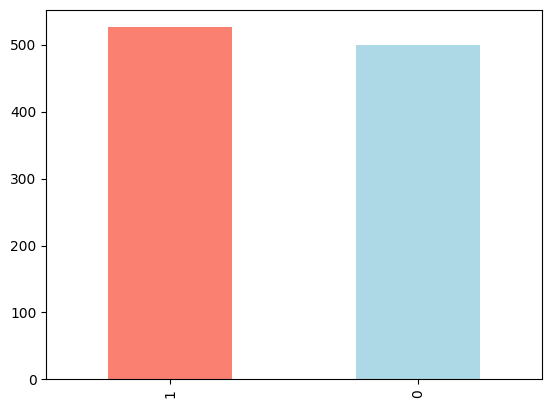

In [3]:
print(df.target.value_counts())

df.target.value_counts().plot(kind="bar", color=["salmon", "lightblue"]);

In [4]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [5]:
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,86,413
1,226,300


(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

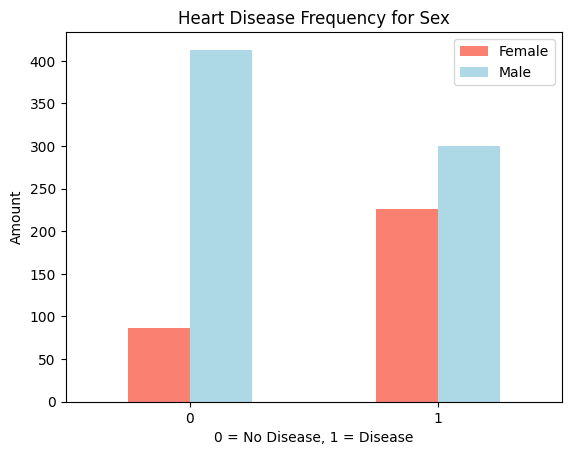

In [6]:
pd.crosstab(df.target, df.sex).plot(kind="bar", color=["salmon", "lightblue"])

plt.title("Heart Disease Frequency for Sex")
plt.xlabel("0 = No Disease, 1 = Disease")
plt.ylabel("Amount")
plt.legend(["Female", "Male"])
plt.xticks(rotation=0)

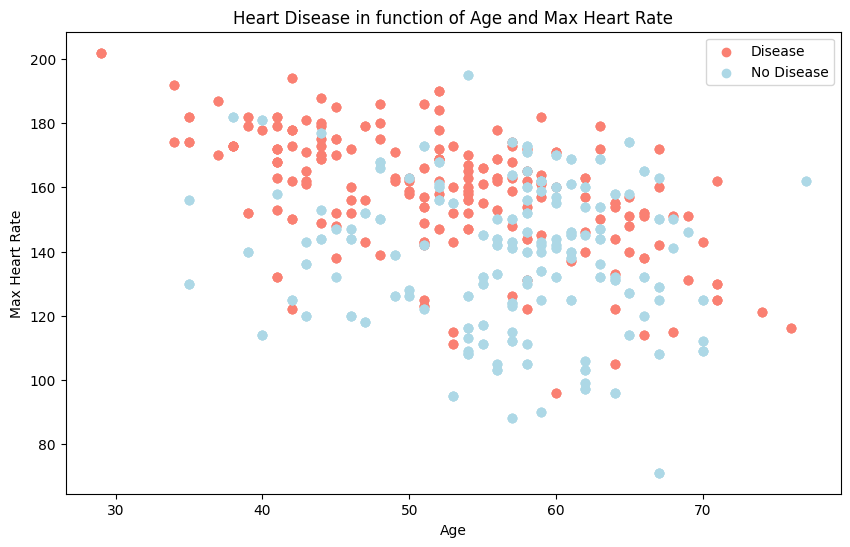

In [7]:
plt.figure(figsize=(10,6))

plt.scatter(df.age[df.target==1], df.thalach[df.target==1], c="salmon")

plt.scatter(df.age[df.target==0], df.thalach[df.target==0], c="lightblue")

plt.title("Heart Disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.legend(["Disease", "No Disease"])
plt.ylabel("Max Heart Rate");

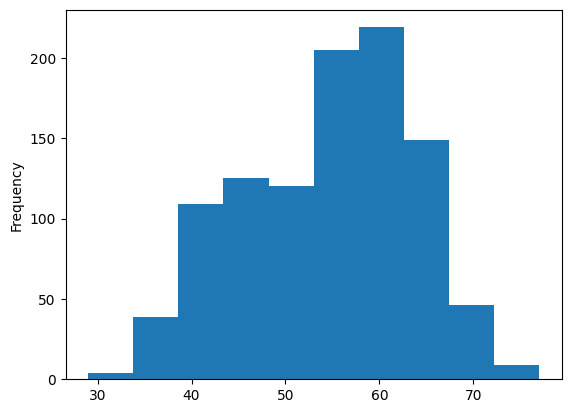

In [8]:
df.age.plot.hist();

In [9]:
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,375,122
1,33,134
2,65,219
3,26,51


(array([0, 1, 2, 3]),
 [Text(0, 0, '0'), Text(1, 0, '1'), Text(2, 0, '2'), Text(3, 0, '3')])

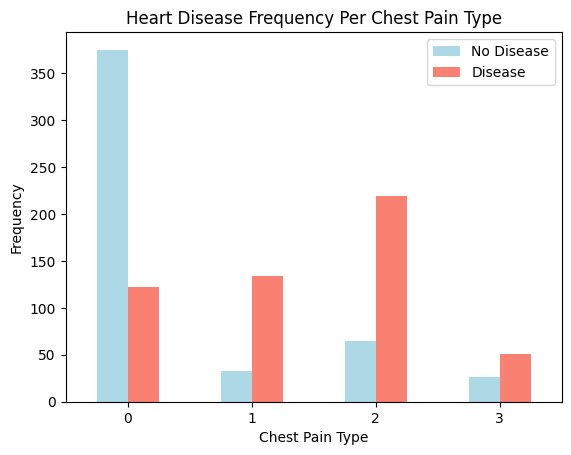

In [10]:
pd.crosstab(df.cp, df.target).plot(kind="bar", color=["lightblue", "salmon"])

plt.title("Heart Disease Frequency Per Chest Pain Type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Frequency")
plt.legend(["No Disease", "Disease"])
plt.xticks(rotation = 0)

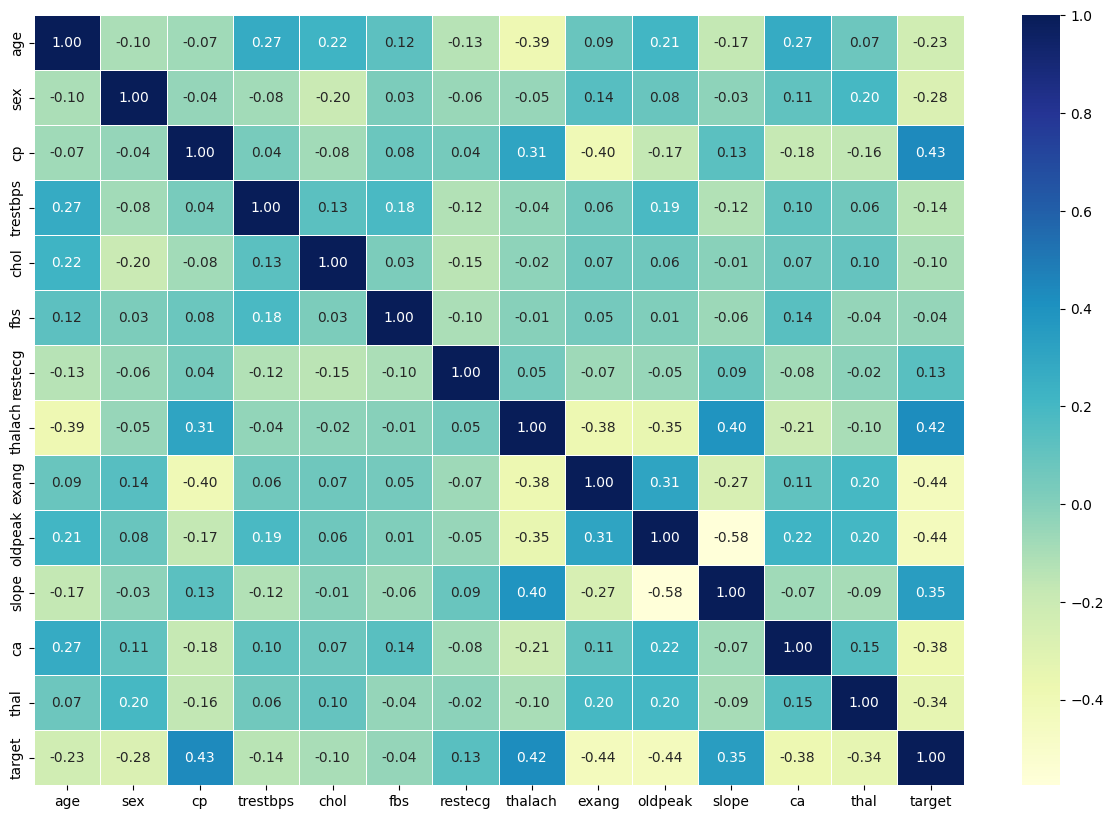

In [11]:
corr_matrix = df.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, linewidths=0.5, fmt= ".2f", cmap="YlGnBu");

In [12]:
X = df.drop("target", axis=1)
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2


In [13]:
y = df.target.values
y, len(y)

(array([0, 0, 0, ..., 0, 1, 0], dtype=int64), 1025)

In [14]:
np.random.seed(42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [15]:
X_train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
835,49,1,2,118,149,0,0,126,0,0.8,2,3,2
137,64,0,0,180,325,0,1,154,1,0.0,2,0,2
534,54,0,2,108,267,0,0,167,0,0.0,2,0,2
495,59,1,0,135,234,0,1,161,0,0.5,1,0,3
244,51,1,2,125,245,1,0,166,0,2.4,1,0,2


In [16]:
y_train, len(y_train)

(array([0, 1, 1, ..., 0, 1, 0], dtype=int64),
 820)

In [17]:
X_test.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
527,62,0,0,124,209,0,1,163,0,0.0,2,0,2
359,53,0,2,128,216,0,0,115,0,0.0,2,0,0
447,55,1,0,160,289,0,0,145,1,0.8,1,1,3
31,50,0,1,120,244,0,1,162,0,1.1,2,0,2
621,48,1,0,130,256,1,0,150,1,0.0,2,2,3


In [18]:
y_test, len(y_test)

(array([1, 1, 0, ..., 1, 0, 0], dtype=int64),
 205)

In [19]:
models = {"KNN": KNeighborsClassifier(), "Logistic Regression": LogisticRegression(), "Random Forest": RandomForestClassifier()}

np.random.seed(42)
    
model_scores = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    model_scores[name] = model.score(X_test, y_test)

model_scores

{'KNN': 0.7317073170731707,
 'Logistic Regression': 0.7853658536585366,
 'Random Forest': 0.9853658536585366}

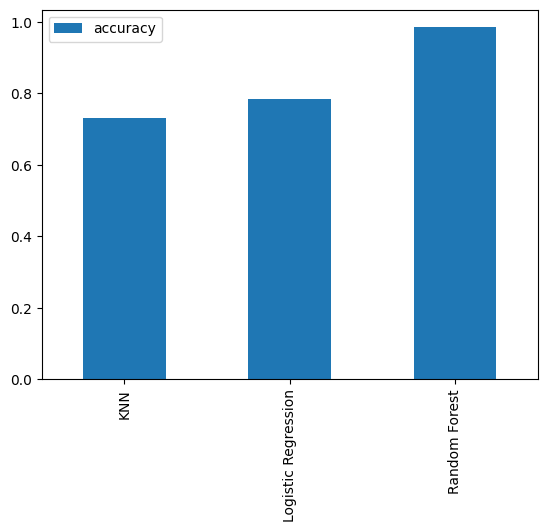

In [20]:
model_compare = pd.DataFrame(model_scores, index=['accuracy'])
model_compare.T.plot.bar();

In [21]:
train_scores = []
test_scores = []

neighbors = range(1, 21)

knn = KNeighborsClassifier()

for i in neighbors:
    knn.set_params(n_neighbors = i)
    knn.fit(X_train, y_train)
    
    train_scores.append(knn.score(X_train, y_train))
    test_scores.append(knn.score(X_test, y_test))

train_scores

[1.0,
 0.9963414634146341,
 0.9914634146341463,
 0.947560975609756,
 0.9231707317073171,
 0.8207317073170731,
 0.7914634146341464,
 0.7926829268292683,
 0.7670731707317073,
 0.7853658536585366,
 0.775609756097561,
 0.7695121951219512,
 0.7609756097560976,
 0.7817073170731708,
 0.7670731707317073,
 0.7670731707317073,
 0.75,
 0.7597560975609756,
 0.7634146341463415,
 0.7682926829268293]

Maximum KNN score on the test data: 98.54%


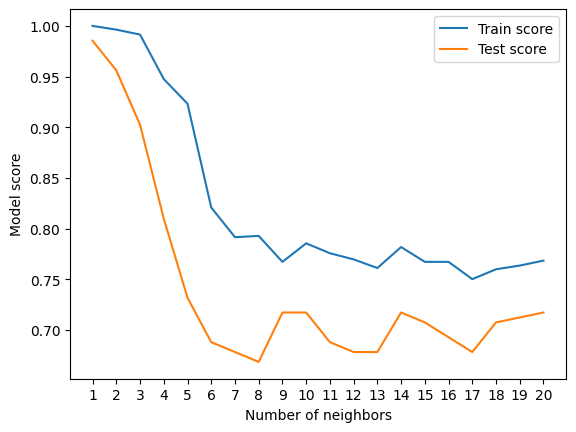

In [22]:
plt.plot(neighbors, train_scores, label="Train score")
plt.plot(neighbors, test_scores, label="Test score")
plt.xticks(np.arange(1, 21, 1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()

print(f"Maximum KNN score on the test data: {max(test_scores)*100:.2f}%")

In [23]:
log_reg_grid = {"C": np.logspace(-4, 4, 20), "solver": ["liblinear"]}

rf_grid = {"n_estimators": np.arange(10, 1000, 50), "max_depth": [None, 3, 5, 10], "min_samples_split": np.arange(2, 20, 2), "min_samples_leaf": np.arange(1, 20, 2)}

In [24]:
np.random.seed(42)

rs_log_reg = RandomizedSearchCV(LogisticRegression(), param_distributions=log_reg_grid, cv=5, n_iter=20, verbose=True)

rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [25]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 1.623776739188721}

In [26]:
rs_log_reg.score(X_test, y_test)

0.7853658536585366

In [27]:
np.random.seed(42)

rs_rf = RandomizedSearchCV(RandomForestClassifier(), param_distributions=rf_grid, cv=5, n_iter=20, verbose=True)

rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [28]:
rs_rf.best_params_

{'n_estimators': 510,
 'min_samples_split': 14,
 'min_samples_leaf': 1,
 'max_depth': None}

In [29]:
rs_rf.score(X_test, y_test)

0.926829268292683

In [30]:
log_reg_grid = {"C": np.logspace(-4, 4, 20), "solver": ["liblinear"]}

gs_log_reg = GridSearchCV(LogisticRegression(), param_grid=log_reg_grid, cv=5, verbose=True)

gs_log_reg.fit(X_train, y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [31]:
gs_log_reg.best_params_

{'C': 1.623776739188721, 'solver': 'liblinear'}

In [32]:
gs_log_reg.score(X_test, y_test)

0.7853658536585366

In [33]:
y_preds = gs_log_reg.predict(X_test)

y_preds, len(y_preds)

(array([1, 1, 0, ..., 1, 0, 0], dtype=int64),
 205)

In [34]:
y_test, len(y_test)

(array([1, 1, 0, ..., 1, 0, 0], dtype=int64),
 205)

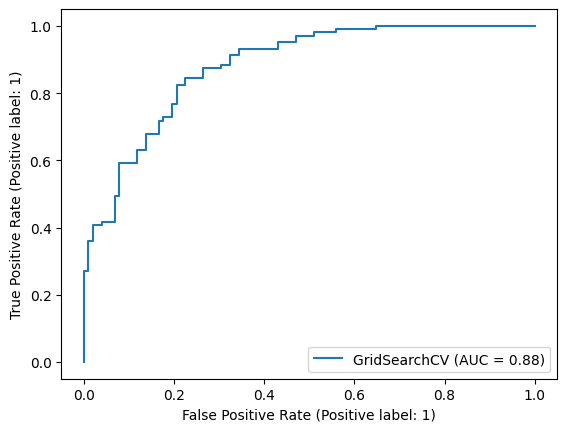

In [35]:
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_estimator(gs_log_reg, X_test, y_test)

In [36]:
print(confusion_matrix(y_test, y_preds))

[[71 31]
 [13 90]]


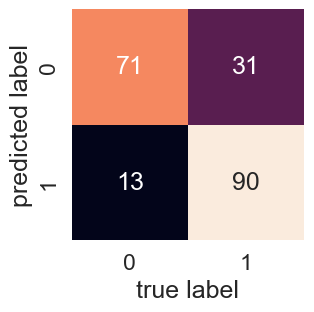

In [37]:
sns.set(font_scale=1.5)

def plot_conf_mat(y_test, y_preds):
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds), annot=True, cbar=False)
    plt.xlabel("true label")
    plt.ylabel("predicted label")

plot_conf_mat(y_test, y_preds)

In [38]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.85      0.70      0.76       102
           1       0.74      0.87      0.80       103

    accuracy                           0.79       205
   macro avg       0.79      0.78      0.78       205
weighted avg       0.79      0.79      0.78       205



In [39]:
gs_log_reg.best_params_

{'C': 1.623776739188721, 'solver': 'liblinear'}

In [40]:
from sklearn.model_selection import cross_val_score

clf = LogisticRegression(C=0.23357214690901212, solver="liblinear")

In [41]:
cv_acc = cross_val_score(clf, X, y, cv=5, scoring="accuracy")
cv_acc

array([0.87804878, 0.84390244, 0.87317073, 0.8195122 , 0.80487805])

In [42]:
cv_acc = np.mean(cv_acc)
cv_acc

0.8439024390243903

In [43]:
cv_precision = np.mean(cross_val_score(clf, X, y, cv=5, scoring="precision"))
cv_precision

0.8145780021766604

In [44]:
cv_recall = np.mean(cross_val_score(clf, X, y, cv=5, scoring="recall"))
cv_recall

0.9012219227313567

In [45]:
cv_f1 = np.mean(cross_val_score(clf, X, y, cv=5, scoring="f1"))
cv_f1

0.8556904806073892

<AxesSubplot: title={'center': 'Cross-Validated Metrics'}>

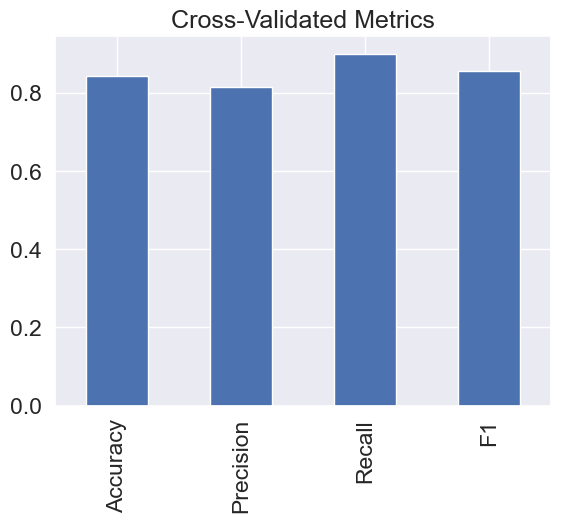

In [46]:
cv_metrics = pd.DataFrame({"Accuracy": cv_acc, "Precision": cv_precision, "Recall": cv_recall, "F1": cv_f1}, index=[0])
cv_metrics.T.plot.bar(title="Cross-Validated Metrics", legend=False)

In [47]:
clf.fit(X_train, y_train)
clf.coef_

array([[ 0.01597611, -1.30385657,  0.78373613, -0.01380376, -0.0070881 ,
        -0.15491025,  0.29072804,  0.03513998, -0.65504748, -0.62602224,
         0.47582733, -0.76001212, -0.93404456]])

In [48]:
features_dict = dict(zip(df.columns, list(clf.coef_[0])))
features_dict

{'age': 0.015976107609401054,
 'sex': -1.30385656973804,
 'cp': 0.7837361291490385,
 'trestbps': -0.013803764588069905,
 'chol': -0.007088101395157676,
 'fbs': -0.15491025413906157,
 'restecg': 0.29072804189804335,
 'thalach': 0.03513997967114106,
 'exang': -0.6550474831307709,
 'oldpeak': -0.6260222374498383,
 'slope': 0.4758273308724375,
 'ca': -0.7600121224389661,
 'thal': -0.9340445621555612}

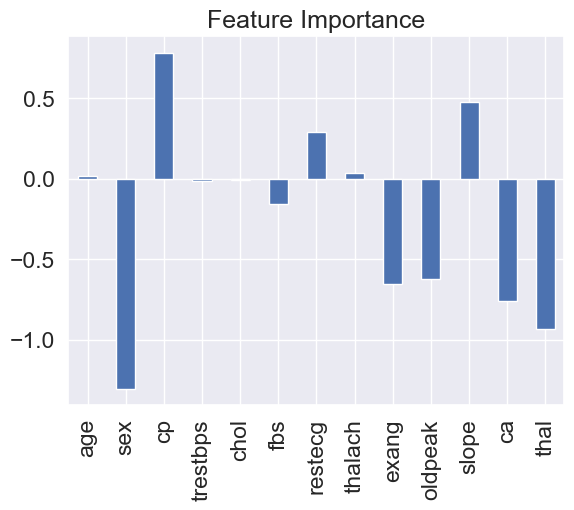

In [49]:
features_df = pd.DataFrame(features_dict, index=[0])
features_df.T.plot.bar(title="Feature Importance", legend=False);

In [50]:
pd.crosstab(df["sex"], df["target"])

target,0,1
sex,,
0,86,226
1,413,300


In [51]:
pd.crosstab(df["slope"], df["target"])

target,0,1
slope,,
0,46,28
1,324,158
2,129,340


Slope is the "slope of the peak exercise ST segment" where:

0: Upsloping: better heart rate with excercise (uncommon)

1: Flatsloping: minimal change (typical healthy heart)

2: Downslopins: signs of unhealthy heart

According to the model, there's a positive correlation of 0.470, not as strong as sex and target but still more than 0.

This positive correlation means our model is picking up the pattern that as slope increases, so does the target value.